In [1]:
from runtest import *
from Data_binary import *
from statistics import median
import time
import numpy as np

In [2]:
env = Data(unknown_rate=1)
env.loadfile("liver.csv") # change this to the test file
env.normalize()
env.alpha = 0
env.cluster_K_means(7)
# this makes it so when we do the ranking, we only check against this number
# of data points; ignore for now
#env.set_validation(2000)
# makes the costs uniform; we won't have groups either
env.set_costs()

# partition into training/test sets
test_env = env.split(0.80)
print("training points:", len(env.data))
print("test points:", len(test_env.data))

training points: 464
test points: 115


In [3]:
costs = [(i+1)/10 for i in range(10)] # list of maximum budgets
#costs = [0.1, 0.2, 0.5]
gammas = {}
for cost in costs:
    if cost >= 0.6:
        gammas[cost] = 0.8
    elif cost == 0.1:
        gammas[cost] = 0.75
    elif cost == 0.2:
        gammas[cost] = 0.81
    elif cost == 0.5:
        gammas[cost] = 0.75
    else:
        gammas[cost]=0.7
results = [] # stores all the results for each value of budget
for c in costs:
    env.max_cost = c
    test_env.max_cost = c
    # take the average of 3 trainings
    r1 = []
    r2 = []
    print("cost",c, "gamma", gammas[c])
    start = time.time()
    agent_distance = testAgent(env,test_env, "liver", c, gamma=gammas[c], max_eps=500, epsilon_decay=0.98)
    r1.append(agent_distance)
    
    for i in range(10):
        random_distance = testRandom(env, test_env, c)
        r2.append(random_distance)
    print("median for RL:", median(r1), "median for random:",median(r2))
    print("mean for RL:", np.mean(r1), "mean for random:",np.mean(r2), "took", time.time()-start,"seconds")
    print()
    results.append([r1,r2])

cost 0.1 gamma 0.75
median for RL: 362.9595157454155 median for random: 369.6535211800474
mean for RL: 362.9595157454155 mean for random: 371.10237468476015 took 4.936318874359131 seconds

cost 0.2 gamma 0.81
median for RL: 287.91190521713554 median for random: 337.498331523574
mean for RL: 287.91190521713554 mean for random: 337.1554000327737 took 2.5282974243164062 seconds

cost 0.3 gamma 0.7
median for RL: 250.42701895725023 median for random: 341.9907929286013
mean for RL: 250.42701895725023 mean for random: 342.3898180707332 took 2.5252950191497803 seconds

cost 0.4 gamma 0.7
median for RL: 209.4383036817916 median for random: 272.02829268434164
mean for RL: 209.4383036817916 mean for random: 272.5374741236871 took 2.8145577907562256 seconds

cost 0.5 gamma 0.75
median for RL: 199.27290216740056 median for random: 244.98973640410065
mean for RL: 199.27290216740056 mean for random: 242.43541851767768 took 2.969688892364502 seconds

cost 0.6 gamma 0.8
median for RL: 146.402285990673

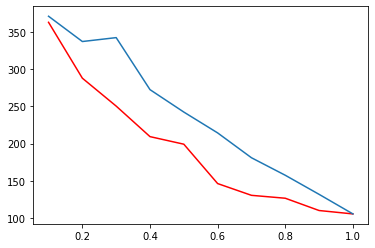

In [4]:
import matplotlib.pyplot as plt

# this value is the total distance between p and 5 closest predicted points to p
resRL = [results[i][0] for i in range(len(results))]
resRAND = [np.mean(results[i][1]) for i in range(len(results))]
plt.plot(costs, resRL, 'r', costs, resRAND)
plt.show()

In [5]:
# we will write the results to BENCHMARK/<test>.csv
f = open('BENCHMARK/liver_test.csv', 'w')

def write(f,lst):
    for l in lst:
        f.write(str(l))
        f.write(' ')

# first write the number of test points
f.write(str(len(test_env.data)))
f.write('\n')
        
# write the cost
write(f,costs)
f.write('\n')

# write the RL result
write(f,resRL)
f.write('\n')

# finally write the random results
write(f, resRAND)
f.write('\n')

f.close()